<a href="https://colab.research.google.com/github/Tina-Gh/Machine_Learning/blob/master/RNN/Section%205%3A%20RNN_(4)_TF2_0_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 348.9MB 56kB/s 
     |████████████████████████████████| 501kB 40.2MB/s 
     |████████████████████████████████| 3.1MB 30.3MB/s 
2.0.0-beta1


In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

This is a time series of the form:

$$ x(t) = \sin(\omega t^2) $$

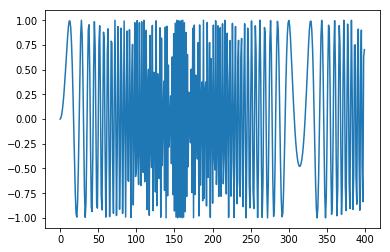

In [ ]:
# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [ ]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 1s 4ms/sample - loss: 1.4840 - val_loss: 1.7948
Epoch 2/80
195/195 [==============================] - 0s 163us/sample - loss: 1.2677 - val_loss: 1.6177
Epoch 3/80
195/195 [==============================] - 0s 133us/sample - loss: 1.1125 - val_loss: 1.4296
Epoch 4/80
195/195 [==============================] - 0s 136us/sample - loss: 0.9785 - val_loss: 1.2705
Epoch 5/80
195/195 [==============================] - 0s 141us/sample - loss: 0.8676 - val_loss: 1.1453
Epoch 6/80
195/195 [==============================] - 0s 148us/sample - loss: 0.7908 - val_loss: 1.0479
Epoch 7/80
195/195 [==============================] - 0s 171us/sample - loss: 0.7244 - val_loss: 0.9804
Epoch 8/80
195/195 [==============================] - 0s 143us/sample - loss: 0.6734 - val_loss: 0.9236
Epoch 9/80
195/195 [==============================] - 0s 138us/sample - loss: 0.6292 - val_loss: 0.8579
Epoch 10/80
195/195 

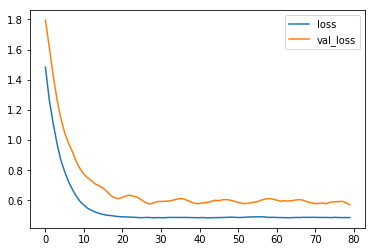

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


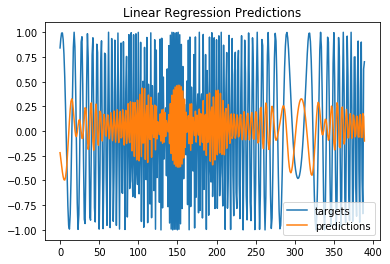

In [ ]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

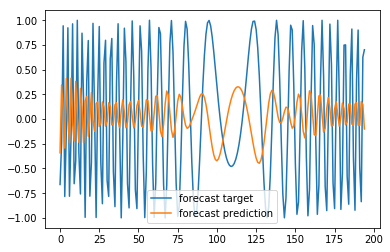

In [ ]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

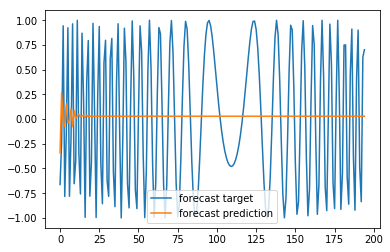

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 3s 15ms/sample - loss: 0.5466 - val_loss: 0.5635
Epoch 2/200
195/195 [==============================] - 0s 287us/sample - loss: 0.5213 - val_loss: 0.5932
Epoch 3/200
195/195 [==============================] - 0s 258us/sample - loss: 0.5075 - val_loss: 0.6299
Epoch 4/200
195/195 [==============================] - 0s 251us/sample - loss: 0.4792 - val_loss: 0.5864
Epoch 5/200
195/195 [==============================] - 0s 263us/sample - loss: 0.4202 - val_loss: 0.5122
Epoch 6/200
195/195 [==============================] - 0s 308us/sample - loss: 0.3570 - val_loss: 0.5067
Epoch 7/200
195/195 [==============================] - 0s 264us/sample - loss: 0.2767 - val_loss: 0.4933
Epoch 8/200
195/195 [==============================] - 0s 259us/sample - loss: 0.1817 - val_loss: 0.1868
Epoch 9/200
195/195 [==============================] - 0s 262us/sample - loss: 0.1132 - val_loss: 0.1706
Epoch 10/2

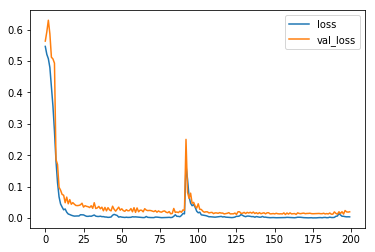

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


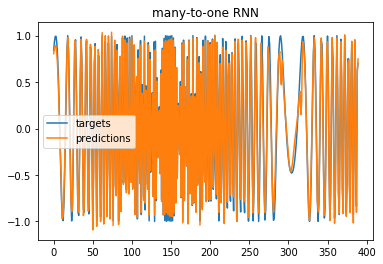

In [ ]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

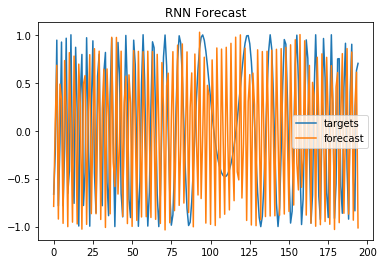

In [ ]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()